In [36]:
??mean_squared_error
??RandomForestRegressor

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os

In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#import file and converting to pandas dataframe 
filename = os.path.join('../datafiles/', 'student-mat.csv')
original_data = pd.read_csv(filename, low_memory=False, sep=',')
print('Data file shape before droping a set of columns :\n',f'{original_data.shape}')

#dropping two columns from original dataset
drop_this = ['G2', 'G3'] #series to be dropped
student_data = original_data.drop(drop_this, axis=1)

print('Data set shape after dropping a set of columns :\n', f'{student_data.shape}')
display(student_data)

Data file shape before droping a set of columns :
 (395, 33)
Data set shape after dropping a set of columns :
 (395, 31)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,7
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,14
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,10
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,11


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f746f438f90>,
      dtype=object)

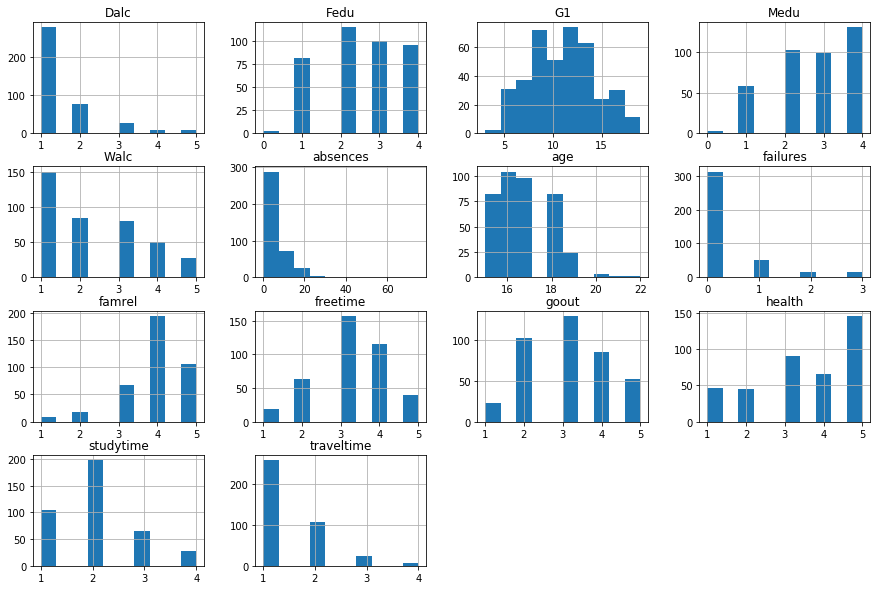

In [136]:
student_hist = student_data.hist(figsize=(15,10))
student_hist

In [4]:
#checking each columns for categorical data
def check_features_values(data_file):
#     print(data_file)
    for columns in data_file.columns:
        print('{} :\n{}\n'.format(columns, data_file[columns].value_counts()))

check_features_values(student_data)

school :
GP    349
MS     46
Name: school, dtype: int64

sex :
F    208
M    187
Name: sex, dtype: int64

age :
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

address :
U    307
R     88
Name: address, dtype: int64

famsize :
GT3    281
LE3    114
Name: famsize, dtype: int64

Pstatus :
T    354
A     41
Name: Pstatus, dtype: int64

Medu :
4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64

Fedu :
2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64

Mjob :
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

Fjob :
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

reason :
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

guardian :
mother    273
father     90
other      32
Name: guardian, dtype: int64

traveltime :
1    257
2    107
3  

In [5]:
# creating the features and label for the model
data_dummies = pd.get_dummies(student_data)
X_features = data_dummies.drop('G1', axis=1)
y_label = data_dummies['G1']

In [42]:
#creating a model
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, random_state=0)
student_model = RandomForestRegressor(n_jobs=-1).fit(X_train, y_train)

score_train = student_model.score(X_train, y_train)
score_test = student_model.score(X_test, y_test)
y_predict = student_model.predict(X_test)

print('Traning set score:\n{}'.format(score_train*100))
print("Test set score :\n{}".format(score_test*100))

Traning set score:
88.01671048147452
Test set score :
21.88182523628499


In [54]:
#Checkin the mean square error
mse = mean_squared_error(y_test, y_predict)
print(mse)

9.141444444444446
